# 가설
## 1. 고객들의 리뷰데이터와 각 플랫폼의 베스트셀러 여부는 유의미한 관계가 있다
## 2. 베스트셀러 등재에 있어 고객 리뷰의 '질적 수준'과 '양적 다양성'이 각 플랫폼별로 상이한 중요성을 가진다.

- 두 가설을 함께 분석한다.
    * 첫 번째 가설이 유의미하다는 결론이 나오면 자연스럽게 두 번째 가설로 이어짐
    * 두 번째 가설에서 단순히 관계가 있다는 것을 넘어 플랫폼과의 관계의 형태와 강도의 차이를 분석하고자 함

- 데이터프레임 목록
    * bs : 베스트셀러 목록
    * ranked_bs : 장르별 도서점수
    * bs_count : 베스트셀러 등극 횟수/이진

## EDA 및 시각화

In [15]:
import pandas as pd
bs = pd.read_csv('베스트셀러_최종버전12.csv')

In [16]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TITLE           5143 non-null   object 
 1   AUTHOR          5143 non-null   object 
 2   PUBLER          5143 non-null   object 
 3   CLASS_NO        5143 non-null   object 
 4   PUBLER_YEAR     5143 non-null   int64  
 5   PAGE            5143 non-null   float64
 6   ISBN            5143 non-null   int64  
 7   kyobo_best      5143 non-null   float64
 8   aladin_best     5143 non-null   float64
 9   yes24_best      5143 non-null   float64
 10  yp_best         5143 non-null   float64
 11  LOAN_COUNT      5143 non-null   float64
 12  E_BOOK          5143 non-null   object 
 13  kyobo_po        5143 non-null   float64
 14  kyobo_ne        5143 non-null   float64
 15  kyobo_pnscore   5143 non-null   float64
 16  kyobo_review    5143 non-null   float64
 17  kyobo_rating    5143 non-null   f

### 1. 장르별 도서 성과
- 각 플랫폼이 어떤 장르의 도서에 대해 고객들로부터 더 높은 평가를 받는지 파악하기 위함

In [17]:
# 중분류별 감성점수

# 1. 플랫폼 점수 열 목록
platform_scores = ['kyobo_score', 'aladin_score', 'yes24_score', 'yp_score']

# 2. CLASS_NO별 평균 점수 계산
genre_score_by_platform = bs.groupby('CLASS_NO')[platform_scores].mean().round(2)

# 3. 각 CLASS_NO별로 플랫폼 점수 정렬 및 순위 저장
ranked_results = []

for class_no, row in genre_score_by_platform.iterrows():
    sorted_scores = row.sort_values(ascending=False)
    ranked_results.append({
        'CLASS_NO': class_no,
        '1위': sorted_scores.index[0].replace('_score', ''),
        '1위점수': sorted_scores.iloc[0],
        '2위': sorted_scores.index[1].replace('_score', ''),
        '2위점수': sorted_scores.iloc[1],
        '3위': sorted_scores.index[2].replace('_score', ''),
        '3위점수': sorted_scores.iloc[2],
        '4위': sorted_scores.index[3].replace('_score', ''),
        '4위점수': sorted_scores.iloc[3],
    })

# 4. 데이터프레임으로 변환 (전체 CLASS_NO 포함)
ranked_bs = pd.DataFrame(ranked_results)

# 5. CLASS_NO 기준으로 정렬해서 보기 좋게 출력
ranked_bs = ranked_bs.sort_values('CLASS_NO')

# 6. 출력
ranked_bs

,CLASS_NO,1위,1위점수,2위,2위점수,3위,3위점수,4위,4위점수
0,가정학 및 가정생활,kyobo,4.11,aladin,3.37,yes24,3.18,yp,0.34
1,"강연집, 수필집, 연설문집",yes24,4.30,kyobo,4.26,aladin,3.00,yp,1.40
2,"건축, 건축학",kyobo,7.46,yes24,4.20,aladin,3.63,yp,1.41
3,경제학,kyobo,5.92,yes24,3.51,aladin,3.23,yp,0.45
4,경학,kyobo,5.33,aladin,3.05,yes24,2.42,yp,0.24
...,...,...,...,...,...,...,...,...,...
70,행정학,kyobo,4.07,aladin,3.45,yes24,2.03,yp,0.00
71,형이상학,kyobo,5.03,aladin,2.99,yes24,1.82,yp,0.00
72,화학,kyobo,3.74,aladin,2.68,yes24,2.46,yp,0.00
73,화학공학,kyobo,3.41,aladin,3.38,yes24,2.95,yp,0.38


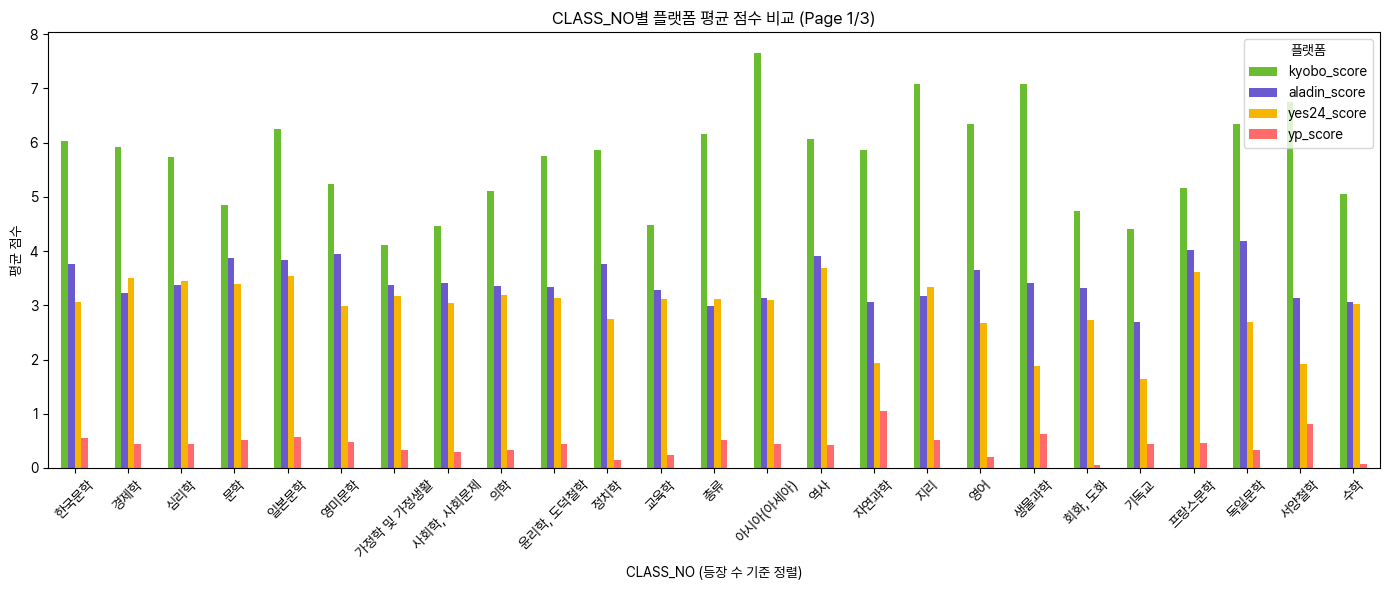

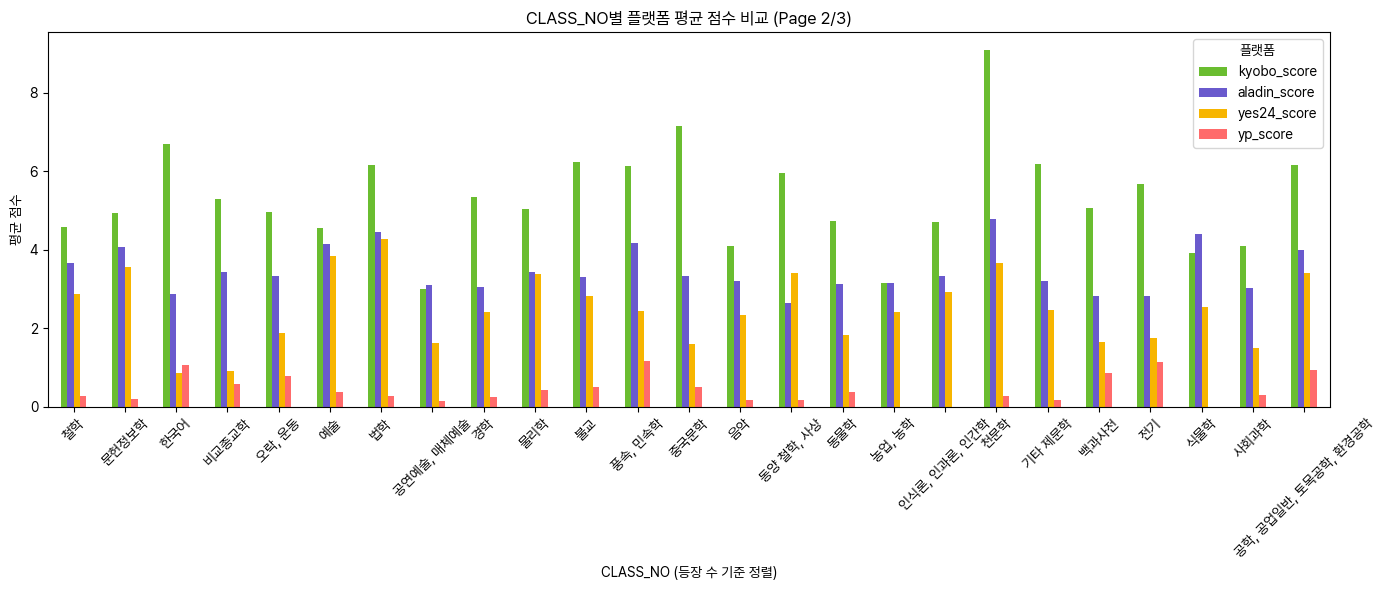

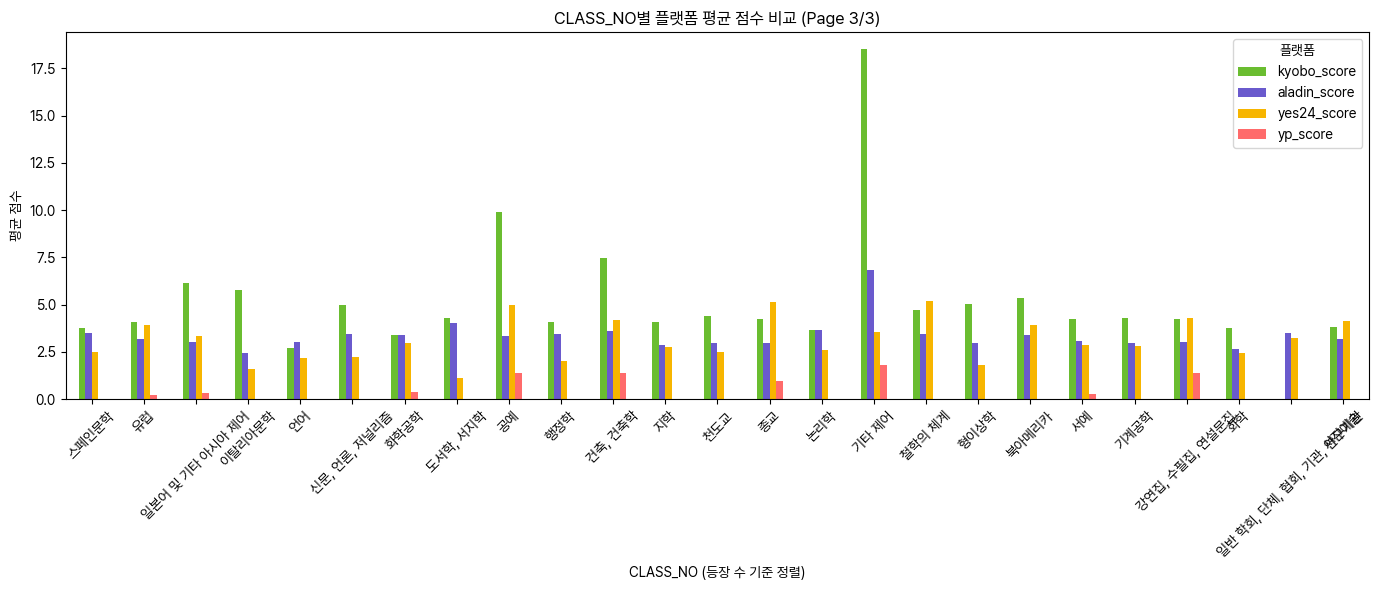

In [ ]:
# 시각화

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
fontpath='C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf' #각자의 경로를 넣습니다.
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='Pretendard')

# ✅ 등장 수 기준으로 CLASS_NO 정렬
# -> 원본 df에서 CLASS_NO별 등장 횟수 계산
class_counts = df['CLASS_NO'].value_counts()

# -> genre_score_by_platform 재정렬
genre_score_sorted = genre_score_by_platform.loc[class_counts.index.intersection(genre_score_by_platform.index)]
genre_score_sorted = genre_score_sorted.reindex(class_counts.index)

# ✅ 페이지 나누기 설정
n_pages = 3
total_rows = len(genre_score_sorted)
rows_per_page = math.ceil(total_rows / n_pages)

# ✅ 페이지별 시각화
for page in range(n_pages):
    start_idx = page * rows_per_page
    end_idx = min(start_idx + rows_per_page, total_rows)

    sliced = genre_score_sorted.iloc[start_idx:end_idx]

    # 그래프 그리기
    colors = ["#6ABD30", "#6A5ACD", "#F7B500", "#FF6B6B"]  # 예: 교보, 알라딘, 예스24, 영풍
    sliced.plot(kind='bar', figsize=(14, 6), color=colors)
    plt.title(f'CLASS_NO별 플랫폼 평균 점수 비교 (Page {page+1}/{n_pages})')
    plt.ylabel('평균 점수')
    plt.xlabel('CLASS_NO (등장 수 기준 정렬)')
    plt.xticks(rotation=45)
    plt.legend(title='플랫폼')
    plt.tight_layout()
    plt.show()


### 분석

1. 교보문고가 전반적으로 우위를 차지하고 있음
- 거의 모든 Class_no에서 교보문고가 가장 높게 나타남
- 아시아(아세아), 자연과학, 지리, 생물과학, 서양철학, 천문학, 중국문학, 한국어 등 에서는 점수가 튐(이상값인가?)
- 기타 제어(이건 뭔 장르지?) 의 교보의 점수 편차가 매우 큼<- 왜지?

2. 예사, 알라딘은 경쟁 구도
- 전체적으로 비슷한 범위를 보이나
- 교육학, 경영학, 수학, 공예 등에서는 예사가 알라딘을 압도적으로 추월
- 정치학, 독일문학, 음악, 공연예술, 비교종교학, 사회과학, 식물학, 이탈리아문학에서는 알라딘이 예사를 압도적으로 추월

* 장르별로 두각을 보이는 플랫폼이 있다.

3. 영풍문고는 모든 장르에서 현저히 낮음
- 대부분 class_no에서 영풍문고의 점수는 5점 이하, 많아야 10점 미만임
- 리뷰 수가 현저히 적어서 그런 것으로 판단

### 2. 각 플랫폼의 베스트셀러 도서 평가점수 평균
- 각 플랫폼에서 '베스트셀러'로 등극한 도서들이 고객들로부터 어느 정도의 '질적 평가'를 받고 있는지 직접적으로 파악하기 위함

In [36]:
# 플랫폼별 점수 컬럼 매핑
platform_to_score = {
    'kyobo_best': 'kyobo_score',
    'aladin_best': 'aladin_score',
    'yes24_best': 'yes24_score',
    'yp_best': 'yp_score'
}

# 결과 저장용 딕셔너리
avg_scores = {}

# 각 플랫폼에 대해 베스트셀러 필터링 후 평균 점수 계산
for best_col, score_col in platform_to_score.items():
    # 베스트셀러로 등재된 도서만 필터링
    best_df = df[df[best_col] == 1]
    
    # 해당 플랫폼의 평가 점수 평균 계산
    avg_score = best_df[score_col].mean()
    
    avg_scores[best_col.replace('_best', '')] = round(avg_score, 2)

# 결과 출력
for platform, score in avg_scores.items():
    print(f"{platform} 베스트셀러 도서의 평균 점수: {score}")


kyobo 베스트셀러 도서의 평균 점수: 7.21
aladin 베스트셀러 도서의 평균 점수: 3.5
yes24 베스트셀러 도서의 평균 점수: 3.36
yp 베스트셀러 도서의 평균 점수: 0.87


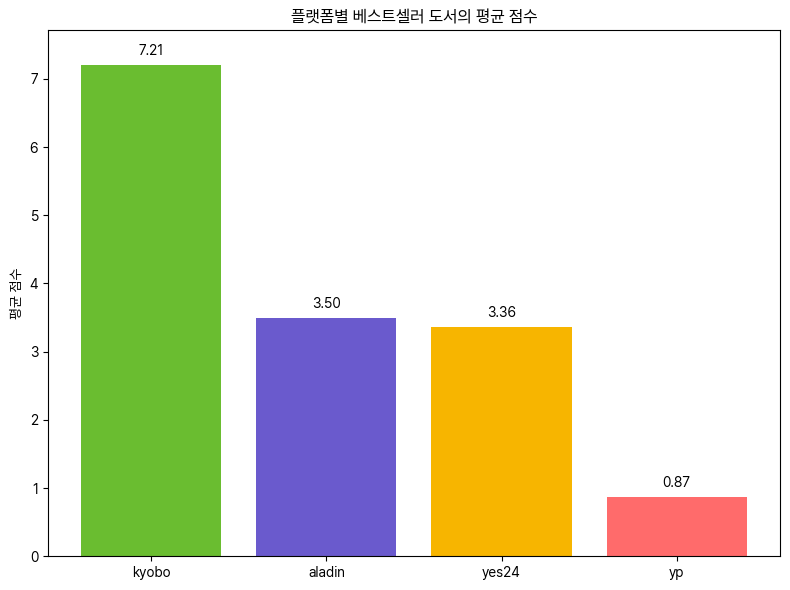

In [37]:
import matplotlib.pyplot as plt

# 점수 데이터
platforms = list(avg_scores.keys())
scores = list(avg_scores.values())

# y축 상한 설정: 최대값 + 여유
y_max = max(scores) + 0.5

# 막대그래프
colors = ["#6ABD30", "#6A5ACD", "#F7B500", "#FF6B6B"]  # 예: 교보, 알라딘, 예스24, 영풍
plt.figure(figsize=(8, 6))
bars = plt.bar(platforms, scores, color=colors)
plt.title('플랫폼별 베스트셀러 도서의 평균 점수')
plt.ylabel('평균 점수')
plt.ylim(0, y_max)  # y축 범위 조정

# 막대 위에 점수 텍스트 추가 (위에 살짝 띄우기)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 분석

- 교보
    - 고객 만족도가 가장 뛰어남
    - 독자들의 인기도 있고, 품질이 뛰어난 책이 많음
- 알라딘
    - yes24보다 미세하게 높음(0.14)
    - 다양하고 많은 책이 등재되지만 독자들의 만족도는 상대적으로 낮은 편
- yes24
    - 알라딘과 큰 차이가 나진 않음
    - 알라딘과 교보에 비해 책의 수, 다양성은 작지만 일정한 지표를 보여줌

## 회귀분석

### 분석 방법 : 로지스틱 회귀

- 왜?
    * '베스트셀러 여부'라는 결과가 '예' 또는 '아니오'와 같이 두 가지 범주로 나뉘는 이진 변수이기 때문
    * "평균 평점이 높을수록 베스트셀러가 될 확률이 유의미하게 증가한다"는 결론을 도출하기 위함
    * 더 나아가, 이 관계가 각 플랫폼별로 어떻게 다르게 나타나는지를 비교함

In [43]:
import pandas as pd
bs_count = pd.read_csv('베스트등극횟수.csv')

In [45]:
bs_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5143 non-null   int64  
 1   CLASS_NO           5143 non-null   object 
 2   kyobo_score        5143 non-null   float64
 3   aladin_score       5143 non-null   float64
 4   yp_score           5143 non-null   float64
 5   yes24_score        5143 non-null   float64
 6   kyobo_best_count   5143 non-null   float64
 7   yes24_best_count   5143 non-null   float64
 8   aladin_best_count  3605 non-null   float64
 9   yp_best_count      5143 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 401.9+ KB


- 변수 생성 : 베스트셀러 여부

### 각 플랫폼별로 독립적인 로지스틱 회귀 모델 구축

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# 1. 베스트셀러 여부 컬럼 생성
bs_count['kyobo_bestcount'] = bs_count['kyobo_best_count'].apply(lambda x: 1 if x > 0 else 0)
bs_count['yes24_bestcount'] = bs_count['yes24_best_count'].apply(lambda x: 1 if x > 0 else 0)
bs_count['aladin_bestcount'] = bs_count['aladin_best_count'].apply(lambda x: 1 if x > 0 else 0)
bs_count['yp_bestcount'] = bs_count['yp_best_count'].apply(lambda x: 1 if x > 0 else 0)

# 2. 로지스틱 회귀 함수 정의
def 가설1(bs_count, platform, additional_features=None):
    """
    특정 플랫폼의 점수와 선택적 장르더미를 사용하여 베스트셀러 여부 예측

    Args:
        df (pd.DataFrame): 전체 도서 데이터프레임
        platform (str): 'kyobo', 'yes24', 'aladin', 'yp' 중 하나
        additional_features (list): 장르 더미 등의 컬럼 리스트

    Returns:
        report_df (pd.DataFrame): classification report in DataFrame format
    """
    score_col = f'{platform}_score'
    target_col = f'{platform}_bestcount'

    if target_col not in bs_count.columns:
        print(f"[{platform}] '{target_col}' 컬럼이 없습니다.")
        return None

    # 설명변수 정의
    features = [score_col]
    if additional_features:
        features += additional_features

    # 결측 제거
    data = bs_count[features + [target_col]].dropna()
    X = data[features]
    y = data[target_col]

    # 클래스가 0과 1 모두 있는지 확인
    if y.nunique() < 2:
        print(f"[{platform}] 0과 1 클래스가 모두 있어야 합니다. 건너뜁니다.")
        return None

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 모델 학습
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_bs_count = pd.DataFrame(report).transpose()

    # 출력
    print(f"\n=== [{platform.upper()}] 로지스틱 회귀 결과 ===")
    print(f"정확도: {model.score(X_test, y_test):.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print(report_bs_count)

    return report_bs_count

# 3. 장르 더미 컬럼 자동 탐색
genre_dummies = [col for col in bs_count.columns if col.startswith('CLASS_NO_')]

# 4. 플랫폼별 모델 실행
kyobo_results = 가설1(bs_count, 'kyobo', additional_features=genre_dummies)
yes24_results = 가설1(bs_count, 'yes24', additional_features=genre_dummies)
aladin_results = 가설1(bs_count, 'aladin', additional_features=genre_dummies)
yp_results = 가설1(bs_count, 'yp', additional_features=genre_dummies)



=== [KYOBO] 로지스틱 회귀 결과 ===
정확도: 0.728
AUC-ROC: 0.772
              precision    recall  f1-score      support
0              0.681551  0.796703  0.734642   728.000000
1              0.786127  0.667485  0.721964   815.000000
accuracy       0.728451  0.728451  0.728451     0.728451
macro avg      0.733839  0.732094  0.728303  1543.000000
weighted avg   0.736787  0.728451  0.727946  1543.000000

=== [YES24] 로지스틱 회귀 결과 ===
정확도: 0.607
AUC-ROC: 0.548
              precision   recall  f1-score     support
0              0.606610  1.00000  0.755143   936.00000
1              0.000000  0.00000  0.000000   607.00000
accuracy       0.606610  0.60661  0.606610     0.60661
macro avg      0.303305  0.50000  0.377572  1543.00000
weighted avg   0.367976  0.60661  0.458078  1543.00000

=== [ALADIN] 로지스틱 회귀 결과 ===
정확도: 0.703
AUC-ROC: 0.448
              precision    recall  f1-score      support
0              0.000000  0.000000  0.000000   458.000000
1              0.703176  1.000000  0.825723  1085.0

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### 분석

1. [교보문고]
    - 정확도 : 72.8%
    - AUC-ROC(이진 분류 모델의 성능을 평가하는 데 사용되는 중요한 지표) : 0.772
    - 0(비베스트셀러)
        * Precision(모델이 특정 클래스라고 예측한 것 중에서 실제로 해당 클래스였던 비율): 약 68.2%
        * Recall(실제 특정 클래스(예: '베스트셀러')에 속하는 데이터 중에서 모델이 해당 클래스라고 올바르게 예측한 비율) : 약 79.7%
    - 1(베스트셀러)
        * Precision : 약 78.6%
        * Recall : 약 79.7%

- ***모델이 0과 1의 클래스를 잘 구분함. 특히 베스트셀러 예측에 대한 정밀도가 약 79%로 높아 전반적으로 준수한 성능을 보임***

2. [예스24]
    - 정확도 : 60.7%
    - AUC-ROC(이진 분류 모델의 성능을 평가하는 데 사용되는 중요한 지표) : 0.548
    - 0(비베스트셀러)
        * Precision : 약 61%
        * Recall : 100%
    - 1(베스트셀러)
        * Precision : 약 0%
        * Recall : 약 0%

- ***베스트셀러(1)에 대한 정밀도, 재현율 모두 0으로 나왔다는 것은 모델이 베스트셀러를 전혀 예측하지 못하고 모든 도서를 비베스트셀러(0)로 분류했을 가능성이 매우 높음. 이는 yes24에서 고객 리뷰의 질적 수준이 베스트셀러 등재에 교보만큼 직접적인 영향을 미치지 않을 수 있다는 것을 보여준다.***

3. [알라딘]
    - 정확도 : 70.3%
    - AUC-ROC(이진 분류 모델의 성능을 평가하는 데 사용되는 중요한 지표) : 0.448
    - 0(비베스트셀러)
        * Precision : 약 0%
        * Recall : 0%
    - 1(베스트셀러)
        * Precision : 약 70%
        * Recall : 약 100%

- ***알라딘 모델은 정확도가 70.3%로 비교적 높아보이지만 AUC-ROC값이 0.448로 0.5보다 낮아 분류 성능이 좋지 않음. 예스24와 마찬가지로 독립변수의 설명력이 거의 없거나 데이터 불균형으로 인한 문제일 수 있음. 이는 알라딘의 양적 다양성을 베스트셀러 지표로 사용할 때, 단순히 점수만으로는 그 다양성을 충분히 예측하기 어렵다는 것을 보여줌.***

4. [영풍문고]
    - 정확도 : 73.0%
    - AUC-ROC(이진 분류 모델의 성능을 평가하는 데 사용되는 중요한 지표) : 0.617
    - 0(비베스트셀러)
        * Precision : 약 75%
        * Recall : 92%
    - 1(베스트셀러)
        * Precision : 약 61%
        * Recall : 약 29%

- *** 영풍문고 모델은 정확도가 73.0%로 가장 높은 축에 속하고 AUC-ROC값이 0.617로 비교적 높다. 하지만 베스트셀러 재현율이 29%로 상당히 낮다. 이는 모델이 0(비베스트셀러)를 예측하는데는 강하지만 1(베스트셀러)를 예측하는데는 어려움을 겪고 있음을 나타냄.***

## 최종결론

1. 가설 1 결론: 고객들의 리뷰 데이터와 각 플랫폼의 베스트셀러 여부는 유의미한 관계가 있다
    * 교보문고의 분석 결과를 통해 강력한 관계가 있다고 판단됨.
    * 하지만 yes24,알라딘, 영풍문고의 모델 성능은 교보문고와 큰 차이를 보였다. 이러한 결과는 리뷰 데이터와 베스트셀러 여부 간의 관계가 존재하지만 그 관계의 강도가 플랫폼별로 다르다는 것을 보여줌

2. 가설 2 결론: 베스트셀러 등재에 있어 고객 리뷰의 '질적 수준'과 '양적 다양성'이 각 플랫폼별로 상이한 중요성을 가진다
    * 교보문고는 리뷰의 질적 수준이 강력한 예측 변수임을 보여주었지만, 다른 플랫폼들은 리뷰 점수 외의 다른 리뷰 특성(예: 리뷰 수)이나 비(非)리뷰 요인(다른 프로모션이나 사은품 등)이 베스트셀러 등재에 더 큰 영향을 미칠 수 있음을 시사하여, 플랫폼별로 중요한 요인이 다름을 암시함